In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


Estamos estudando o rendimento mensal dos chefes de domicílio com renda até R$5000,00 no Brasil. Nosso supervisor determinou que o erro máximo em relação a média seja de R$10,00. Sabemos que o desvio padrão populacional deste grupo de trabalhadores é de R$1.082,79 e que a média populacional é de R$1.426,54. Para um nível de confiança de 95%, qual dever ser o tamanho da amostra de nosso estudo? Qual o intervalo de confiança para a média, consideranndo o tamanho da amostra obtido?

In [3]:
renda_5000 = dados.query('Renda <= 5000').Renda
renda_5000

0         800
1        1150
2         880
3        3500
4         150
         ... 
76835     812
76836    1500
76837    1300
76838    1500
76839     900
Name: Renda, Length: 72109, dtype: int64

In [4]:
media = renda_5000.mean()
sigma = renda_5000.std()

print(f'Média populacional: {media:.2f}\nDesvio padrão populacional: {sigma:.2f}')

Média populacional: 1426.54
Desvio padrão populacional: 1082.79


In [5]:
# Tamanho da amostra
z = norm.ppf(.975)
err = 10
n = round(
    (z * (sigma/err)) ** 2
)
print(f"A amostra deverá conter {n} registros.")

A amostra deverá conter 45039 registros.


In [6]:
# Intervalo de Confiança
intervalo = norm.interval(
    confidence = 0.95,
    loc = media,
    scale = sigma/np.sqrt(n)
)
intervalo

(1416.5372195108241, 1436.5372094786223)

In [7]:
# Prova gráfica
tamanho_simulacao: int = 1_000
medias = [renda_5000.sample(n).mean() for i in range(1, tamanho_simulacao+1)]
df = pd.DataFrame(medias)

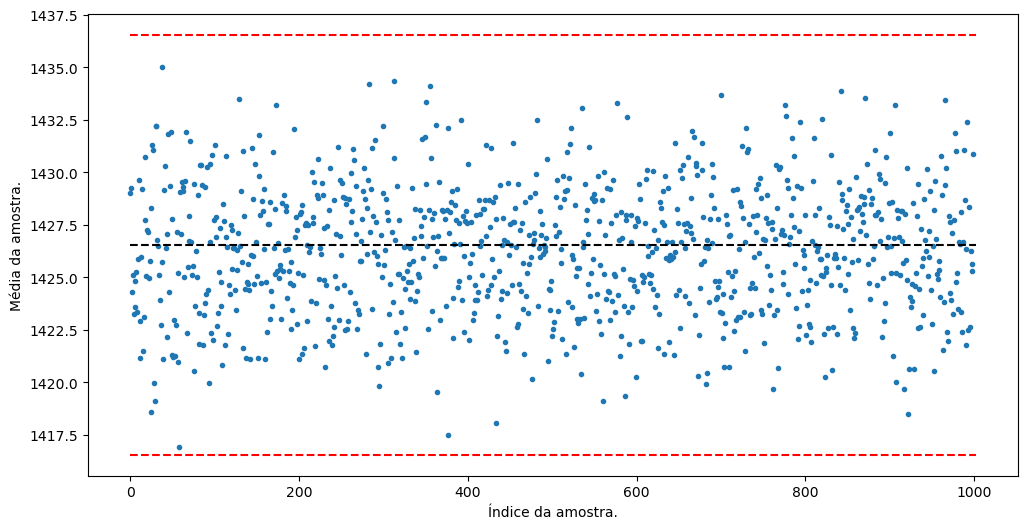

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(medias, '.')

# Linhas do intevalo
ax.hlines(y=media, xmin=0, xmax=tamanho_simulacao+2, colors='k', linestyles='dashed')
ax.hlines(y=intervalo[0], xmin=0, xmax=tamanho_simulacao+2, colors='red', linestyles='dashed') # lower bound 
ax.hlines(y=intervalo[1], xmin=0, xmax=tamanho_simulacao+2, colors='red', linestyles='dashed') # upper bound
plt.xlabel("Índice da amostra.")
plt.ylabel("Média da amostra.");
